#PROBLEM DESCRIPTION


ABC Pharma wants to automate the identification of drug persistence as per
the physician's prescription. The goal is to build a classification model to
predict whether a patient will persist with their treatment and to identify the
factors that influence drug persistence.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("/content/healthcare_data_cleaned.csv")

In [3]:
df.shape

(3424, 65)

In [4]:
df.head()

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 65 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [6]:
df.isnull().sum()

,0
ptid,0
persistency_flag,0
gender,0
race,0
ethnicity,0
...,...
risk_hysterectomy_oophorectomy,0
risk_estrogen_deficiency,0
risk_immobilization,0
risk_recurring_falls,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,dexa_freq_during_rx,count_of_risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [9]:
df.describe(include="object")

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,2,4,4,35,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,P1,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,N,N,VLR_LR,>-2.5,Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3326,1443,1439,1535,2013,2104,2619,2522,2488,2872,3007,1931,1951,3251,2557,3056,1891,1911,2072,2331,2425,2633,2607,2645,2747,2906,1765,2507,2775,2794,2242,2191,2451,2465,2787,2821,2853,2985,2927,3071,3285,3421,3294,3422,3297,3412,3168,2780,2954,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


#EDA

###TARGET VARIABLE: Persistency flag

<Axes: xlabel='persistency_flag', ylabel='count'>

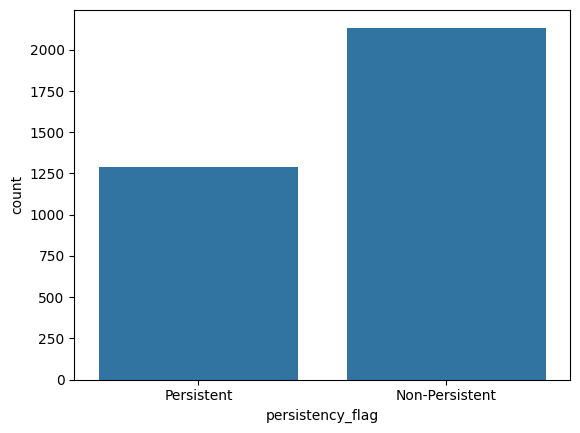

In [11]:
sns.countplot(data=df, x='persistency_flag')

In [12]:
df['persistency_flag'].value_counts(normalize=True)

,proportion
persistency_flag,
Non-Persistent,0.62354
Persistent,0.37646


~62.3% of patients in the dataset are Non-Persistent

In [13]:
def stacked_barplot(data, predictor, target, target_order=None):
    """
    Displays category counts, percentages and a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    target_order: order of target variable
    """

    if target_order is not None:
        data[target] = pd.Categorical(data[target], categories=target_order, ordered=True)

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    #Raw counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    #Calculate percentages
    tab1_percent = tab1.div(tab1["All"], axis=0) * 100
    tab1_percent = tab1_percent.drop(columns=["All"])

    print("Counts:")
    print(tab1)
    print("-" * 120)
    print("Percentages (%):")
    print(tab1_percent.round(2))  # Round percentages to 2 decimal places
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Patient Demographics

In [14]:
#demographic columns
dem_cols = ['gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'idn_indicator']

Counts:
persistency_flag  Persistent  Non-Persistent   All
gender                                            
All                     1289            2135  3424
Female                  1212            2018  3230
Male                      77             117   194
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
gender                                      
All                    37.65           62.35
Female                 37.52           62.48
Male                   39.69           60.31
------------------------------------------------------------------------------------------------------------------------


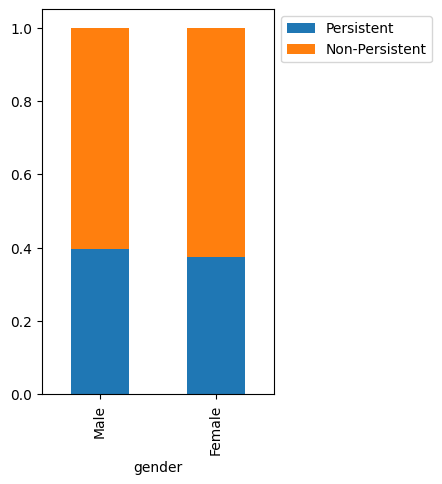

Counts:
persistency_flag  Persistent  Non-Persistent   All
race                                              
All                     1289            2135  3424
Caucasian               1185            1963  3148
Asian                     41              43    84
Other                     33              64    97
African American          30              65    95
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
race                                        
All                    37.65           62.35
Caucasian              37.64           62.36
Asian                  48.81           51.19
Other                  34.02           65.98
African American       31.58           68.42
------------------------------------------------------------------------------------------------------------------------


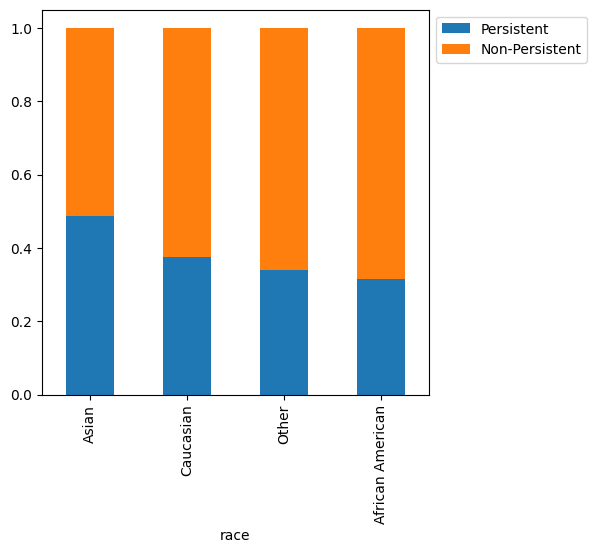

Counts:
persistency_flag  Persistent  Non-Persistent   All
ethnicity                                         
All                     1289            2135  3424
Not Hispanic            1257            2069  3326
Hispanic                  32              66    98
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
ethnicity                                   
All                    37.65           62.35
Not Hispanic           37.79           62.21
Hispanic               32.65           67.35
------------------------------------------------------------------------------------------------------------------------


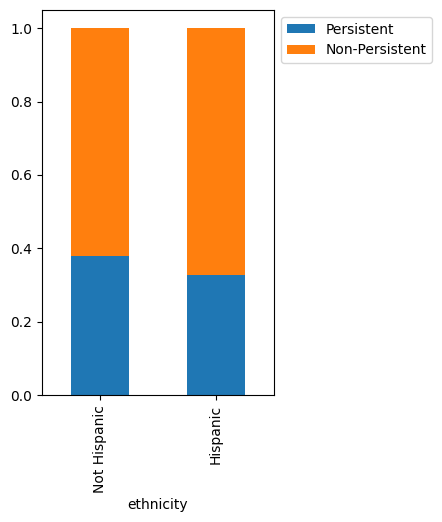

Counts:
persistency_flag  Persistent  Non-Persistent   All
region                                            
All                     1289            2135  3424
South                    494             753  1247
Midwest                  474             969  1443
West                     223             279   502
Northeast                 98             134   232
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
region                                      
All                    37.65           62.35
South                  39.62           60.38
Midwest                32.85           67.15
West                   44.42           55.58
Northeast              42.24           57.76
------------------------------------------------------------------------------------------------------------------------


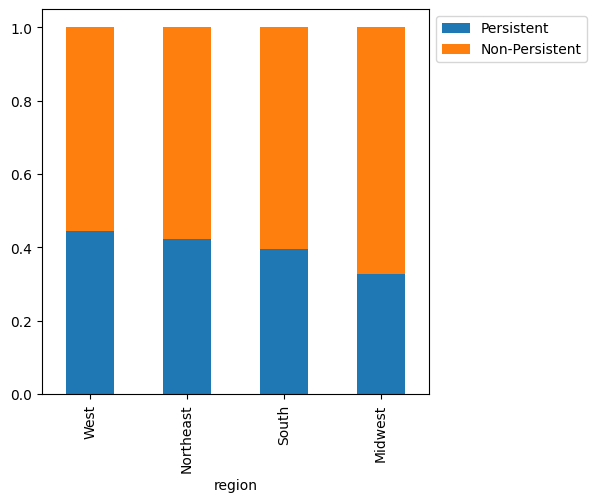

Counts:
persistency_flag  Persistent  Non-Persistent   All
age_bucket                                        
All                     1289            2135  3424
>75                      532             907  1439
65-75                    433             653  1086
55-65                    261             472   733
<55                       63             103   166
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
age_bucket                                  
All                    37.65           62.35
>75                    36.97           63.03
65-75                  39.87           60.13
55-65                  35.61           64.39
<55                    37.95           62.05
------------------------------------------------------------------------------------------------------------------------


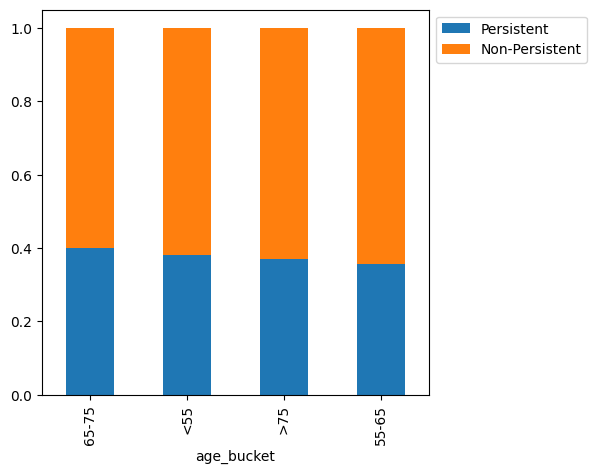

Counts:
persistency_flag  Persistent  Non-Persistent   All
idn_indicator                                     
All                     1289            2135  3424
Y                       1043            1514  2557
N                        246             621   867
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
idn_indicator                               
All                    37.65           62.35
Y                      40.79           59.21
N                      28.37           71.63
------------------------------------------------------------------------------------------------------------------------


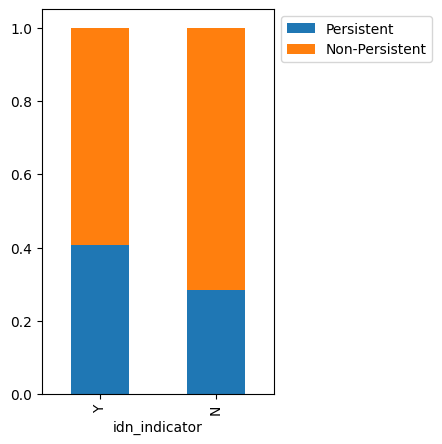

In [15]:
for col in dem_cols:
  stacked_barplot(df, col, "persistency_flag", target_order = ["Persistent", "Non-Persistent"])



*   Gender: The female patients have higher counts for the Persistent and Non-persitent groups compared to the male patients. However the non-persistent group is more prevalent among the female population.

*   Race: For each racial group, the count of Non persistent patients is higher. The Caucasian category has the highest counts for both persistent and non-persistent.
The Asian category has the highest persistence rate of 48.81% and the African American group has the highest rate of Non persistence at 68.42%

*   Ethinicity:  Non hispanics form a majority of the sample. Hispanic patients have a higher rate of non-persistence at 67.35%
*   Region: The regions with highest rates of persistence are the West and Northeast at 44.42% and 42,24% respectively. Patients from the Midwest have the highest rate of non-persistence at 67.15%


*   Age Bucket: Across the age groups, there is a slight variation of persistent rate. Patients aged 55-65 have the lowest persistent rate at 35.61% while patients aged 65-75 have the highest persistence rate at 39.87%



*   IDN Indicator: Patients mapped to an IDN have a much higher persistent rate (40.79%) than those who aren't (28.37%)



###Provider Attributes

In [16]:
provider_cols = ['ntm_specialist_flag',
       'ntm_speciality_bucket']

Counts:
persistency_flag     Persistent  Non-Persistent   All
ntm_specialist_flag                                  
All                        1289            2135  3424
Specialist                  645             766  1411
Others                      644            1369  2013
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag     Persistent  Non-Persistent
ntm_specialist_flag                            
All                       37.65           62.35
Specialist                45.71           54.29
Others                    31.99           68.01
------------------------------------------------------------------------------------------------------------------------


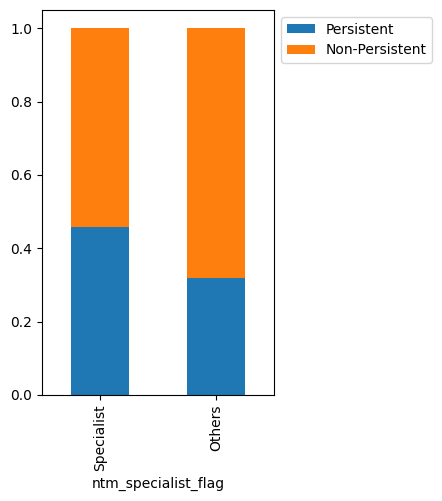

Counts:
persistency_flag           Persistent  Non-Persistent   All
ntm_speciality_bucket                                      
All                              1289            2135  3424
OB/GYN/Others/PCP/Unknown         675            1429  2104
Endo/Onc/Uro                      386             330   716
Rheum                             228             376   604
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag           Persistent  Non-Persistent
ntm_speciality_bucket                                
All                             37.65           62.35
OB/GYN/Others/PCP/Unknown       32.08           67.92
Endo/Onc/Uro                    53.91           46.09
Rheum                           37.75           62.25
------------------------------------------------------------------------------------------------------------------------


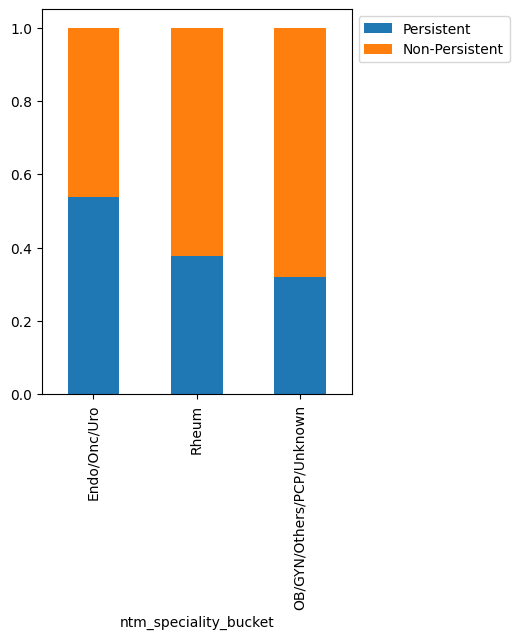

In [17]:
for col in provider_cols:
  stacked_barplot(df, col, "persistency_flag", target_order = ["Persistent", "Non-Persistent"])



*   NTM Specialist Flag: Patients seen by a specialist have a higher persistence rate at 45.71%
*   NTM Specialist Bucket: Patients treated by Endocrinologists/Oncoligists/Urologist have a higher persistence rate at 53.91%



###Clinical Factors


In [18]:
#clinical factors
clinical_cols = ['gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm']

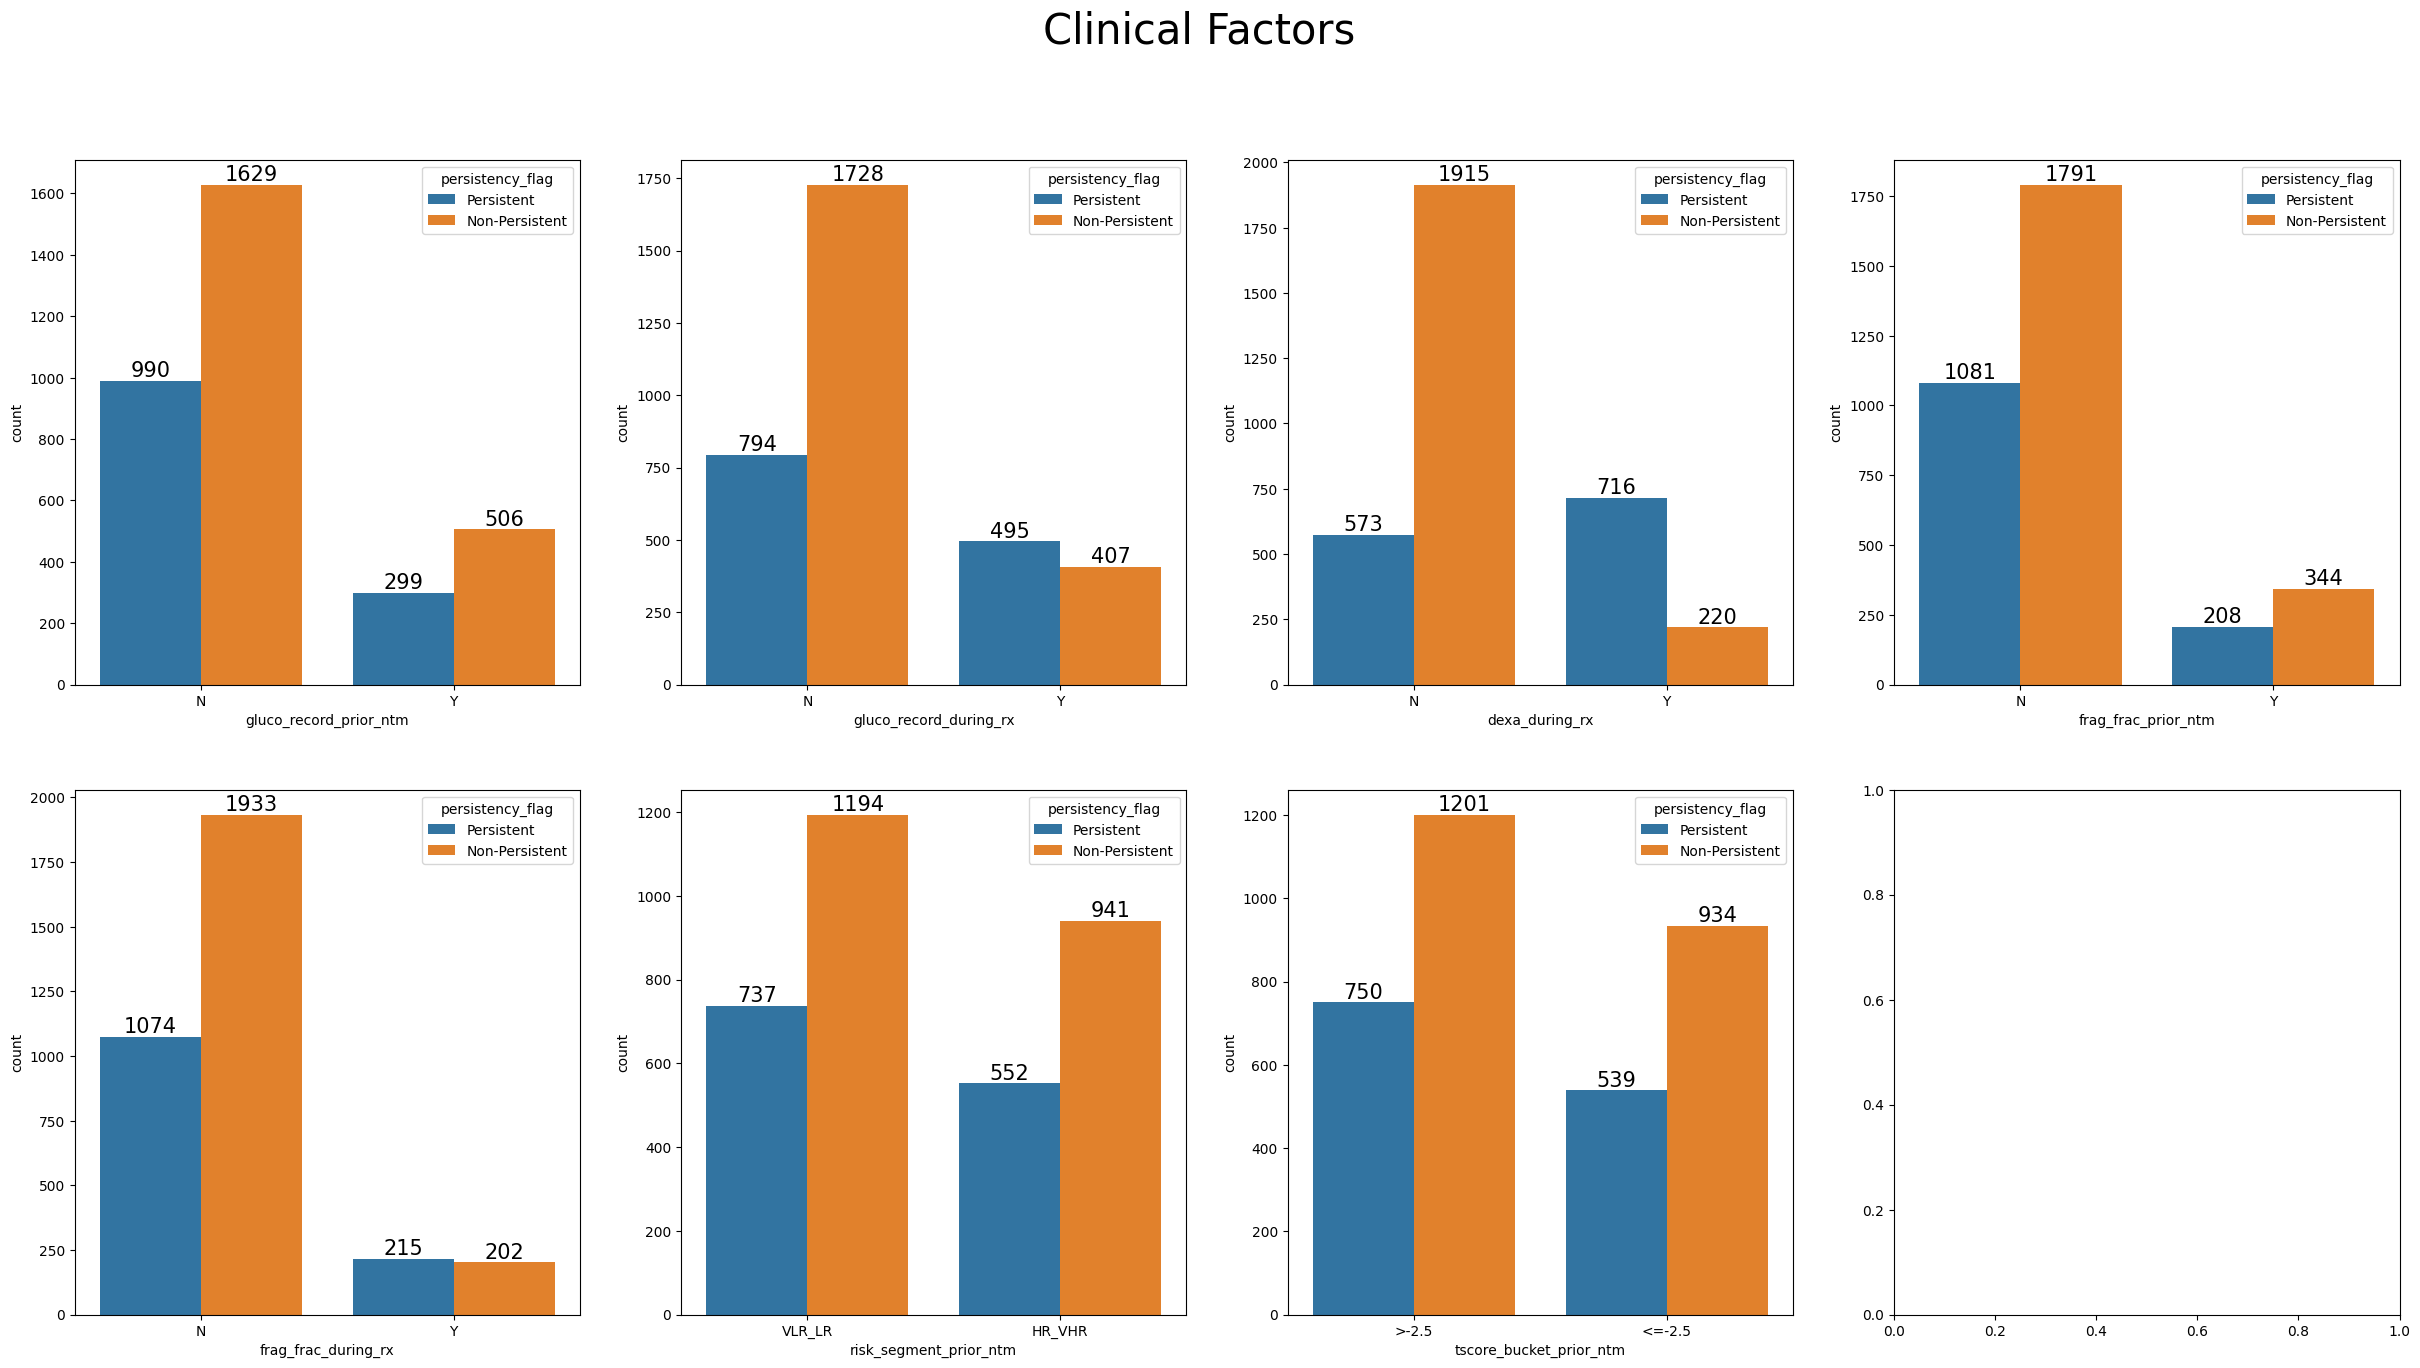

In [19]:
fig, axs = plt.subplots(2,4, figsize = (30,15))
plt.suptitle("Clinical Factors", fontsize = 30)
axs = axs.flatten()
for ax, col in zip(axs, clinical_cols):
  sns.countplot(data=df, x=col, ax = ax, hue = "persistency_flag")
  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

Patients who had recorded glucocorticoid usage during therapy, dexa scan during treatment and fragility fracture during therapy had a higher rate of persistence

<Axes: xlabel='persistency_flag', ylabel='dexa_freq_during_rx'>

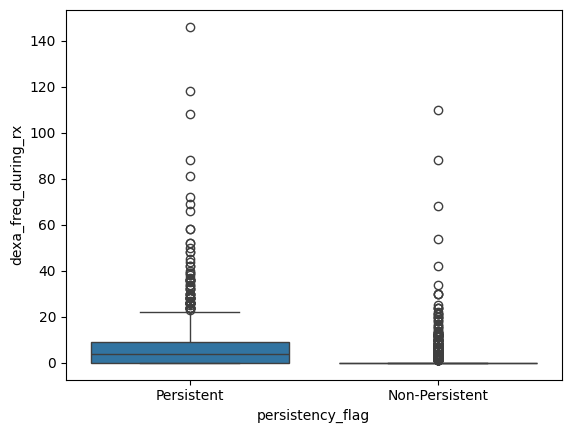

In [20]:
sns.boxplot(data=df, x = "persistency_flag", y = "dexa_freq_during_rx")

Patients persistent with their treatment on average have higher frequencies of dexa scans

###Disease and Treatment Factors

Counts:
persistency_flag                 Persistent  Non-Persistent   All
injectable_experience_during_rx                                  
All                                    1289            2135  3424
Y                                      1201            1855  3056
N                                        88             280   368
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag                 Persistent  Non-Persistent
injectable_experience_during_rx                            
All                                   37.65           62.35
Y                                     39.30           60.70
N                                     23.91           76.09
------------------------------------------------------------------------------------------------------------------------


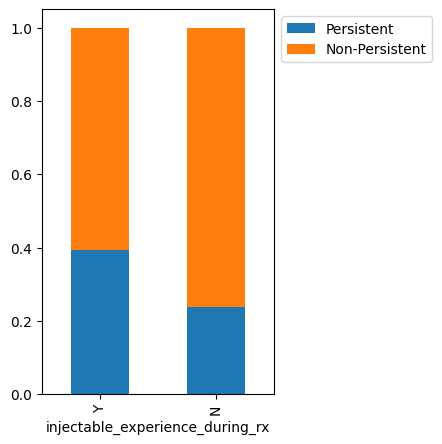

In [21]:
stacked_barplot(df, "injectable_experience_during_rx", "persistency_flag", target_order = ["Persistent", "Non-Persistent"])

Patients with injectable experience during treatment have a higher rate of persistence at 39.30%

Counts:
persistency_flag  Persistent  Non-Persistent   All
adherent_flag                                     
All                     1289            2135  3424
Adherent                1183            2068  3251
Non-Adherent             106              67   173
------------------------------------------------------------------------------------------------------------------------
Percentages (%):
persistency_flag  Persistent  Non-Persistent
adherent_flag                               
All                    37.65           62.35
Adherent               36.39           63.61
Non-Adherent           61.27           38.73
------------------------------------------------------------------------------------------------------------------------


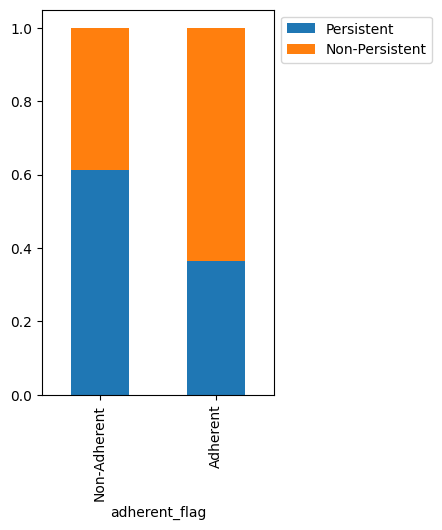

In [22]:
stacked_barplot(df, "adherent_flag", "persistency_flag", target_order = ["Persistent", "Non-Persistent"])

The percentage of Persistent patients is higher among the Non-Adherent patients (61.27%) compared to Adherent patients (36.39%)

####Risk Factors

In [23]:
#risks
risk_cols = ['risk_type_1_insulin_dependent_diabetes',
       'risk_osteogenesis_imperfecta', 'risk_rheumatoid_arthritis',
       'risk_untreated_chronic_hyperthyroidism',
       'risk_untreated_chronic_hypogonadism', 'risk_untreated_early_menopause',
       'risk_patient_parent_fractured_their_hip', 'risk_smoking_tobacco',
       'risk_chronic_malnutrition_or_malabsorption',
       'risk_chronic_liver_disease', 'risk_family_history_of_osteoporosis',
       'risk_low_calcium_intake', 'risk_vitamin_d_insufficiency',
       'risk_poor_health_frailty', 'risk_excessive_thinness',
       'risk_hysterectomy_oophorectomy', 'risk_estrogen_deficiency',
       'risk_immobilization', 'risk_recurring_falls']

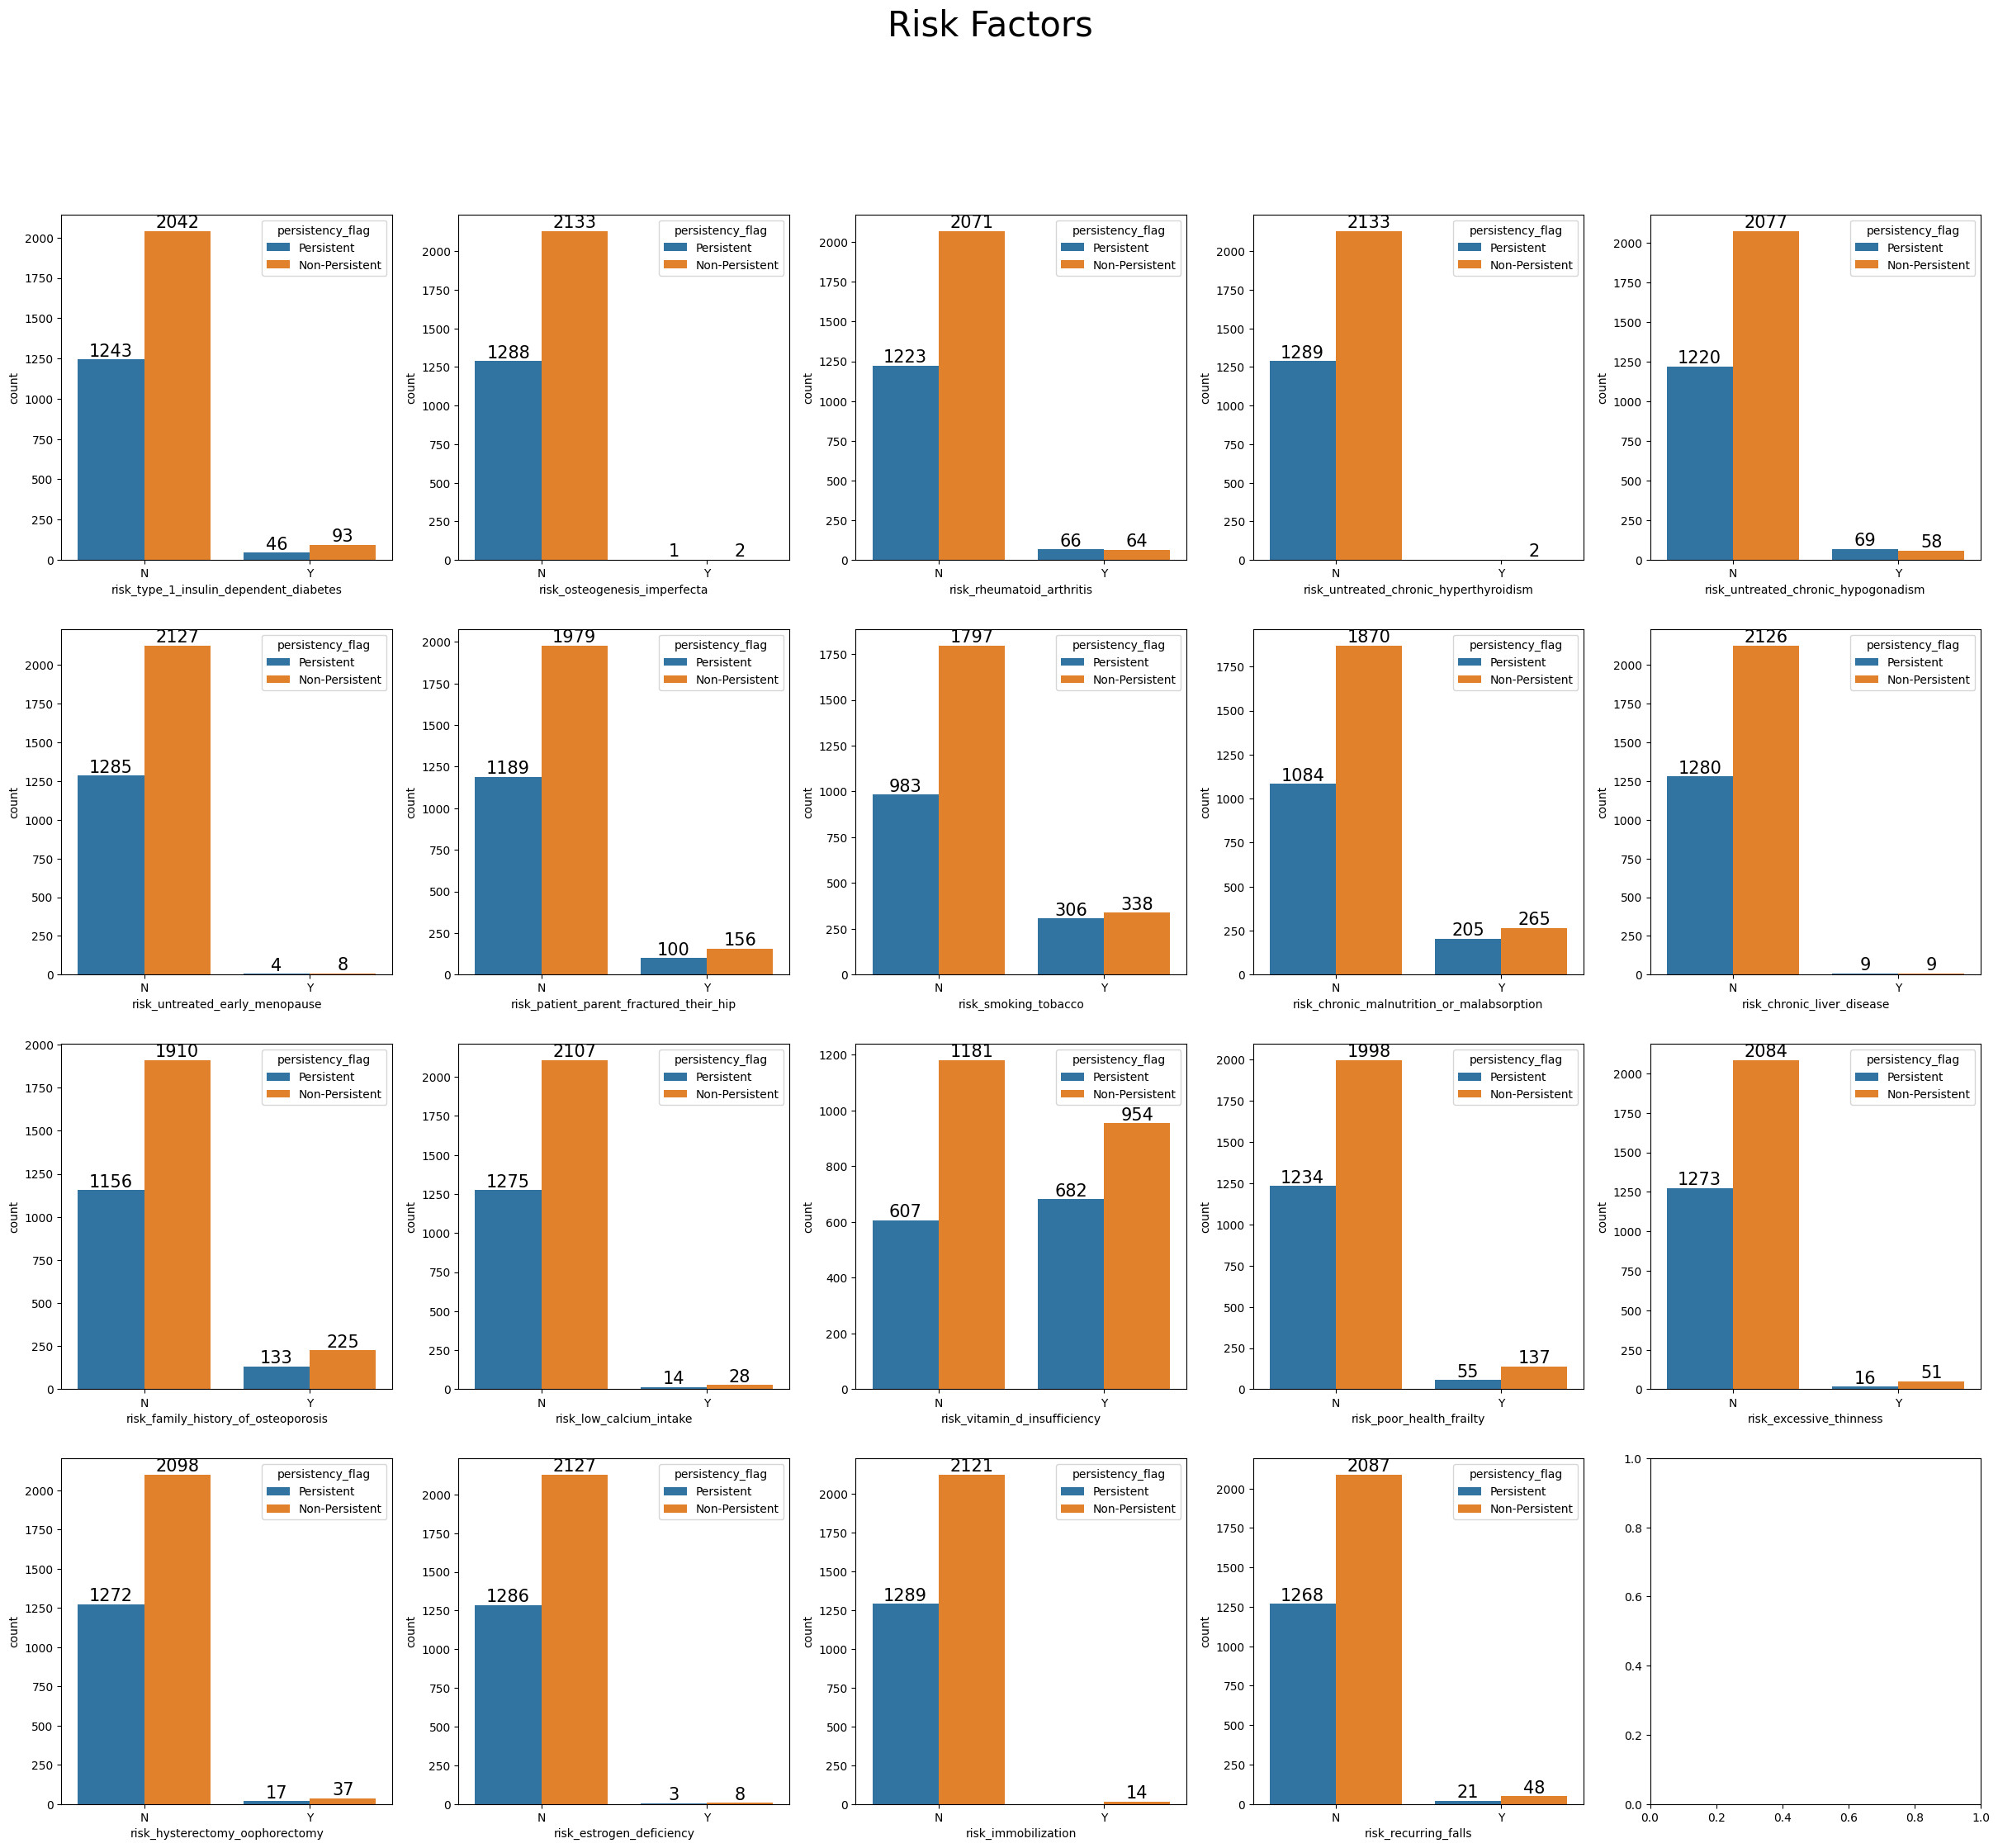

In [24]:
fig, axs = plt.subplots(4,5, figsize = (30,25))
plt.suptitle("Risk Factors", fontsize = 30)
axs = axs.flatten()
for ax, col in zip(axs, risk_cols):
  sns.countplot(data=df, x=col, ax = ax, hue = "persistency_flag")
  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

Only patients with rheumatoid arthritis and untreated chronic hypogonadism had higher persistence rates

####Concomitances

In [25]:
#concomitances

concom_cols = [ 'concom_cholesterol_and_triglyceride_regulating_preparations',
       'concom_narcotics', 'concom_systemic_corticosteroids_plain',
       'concom_anti_depressants_and_mood_stabilisers',
       'concom_fluoroquinolones', 'concom_cephalosporins',
       'concom_macrolides_and_similar_types',
       'concom_broad_spectrum_penicillins', 'concom_anaesthetics_general',
       'concom_viral_vaccines']

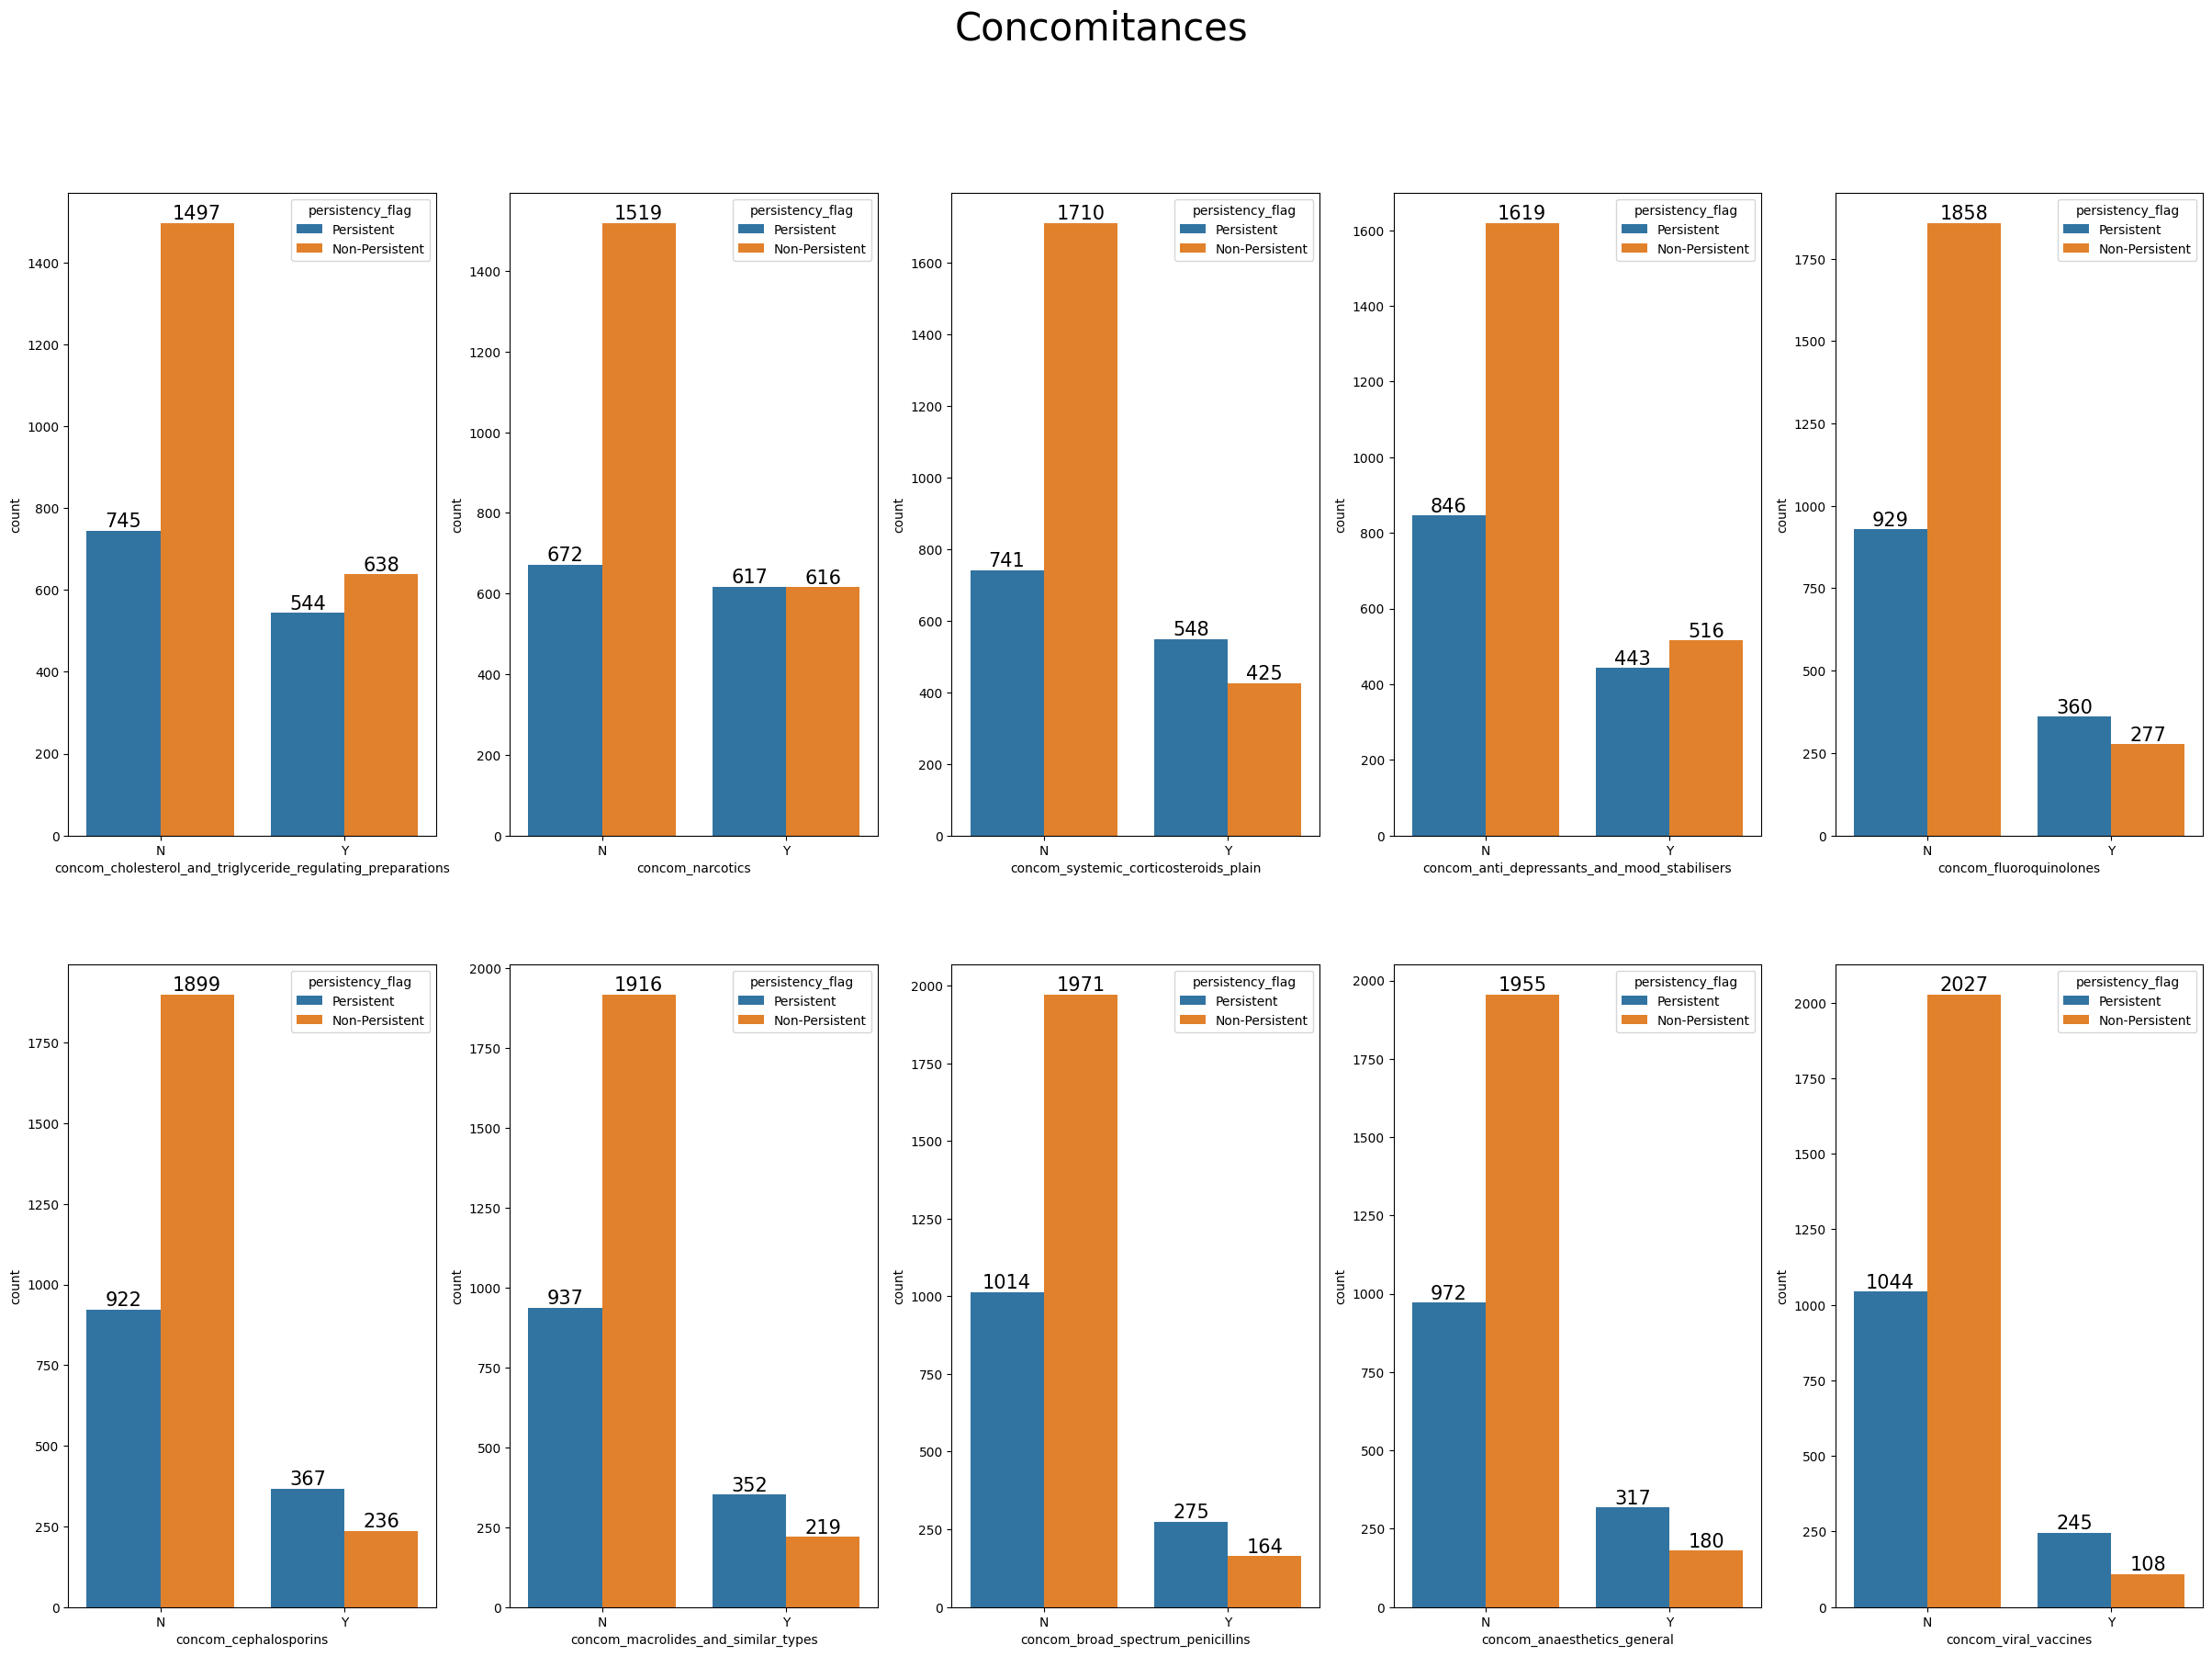

In [26]:
fig, axs = plt.subplots(2,5, figsize = (30,20))
plt.suptitle("Concomitances", fontsize = 30)
axs = axs.flatten()
for ax, col in zip(axs, concom_cols):
  sns.countplot(data=df, x=col, ax = ax, hue = "persistency_flag")
  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

Patients with these concomitances have lower persistence rates:
*   cholesterol and triglyceride regulating preparations
*   anti_depressants and mood stabilisers


####Comorbidities

In [27]:
#comorbidities
comorb_cols = ['comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'comorb_personal_history_of_other_diseases_and_conditions',
       'comorb_other_disorders_of_bone_density_and_structure',
       'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'comorb_osteoporosis_without_current_pathological_fracture',
       'comorb_personal_history_of_malignant_neoplasm',
       'comorb_gastro_esophageal_reflux_disease',]

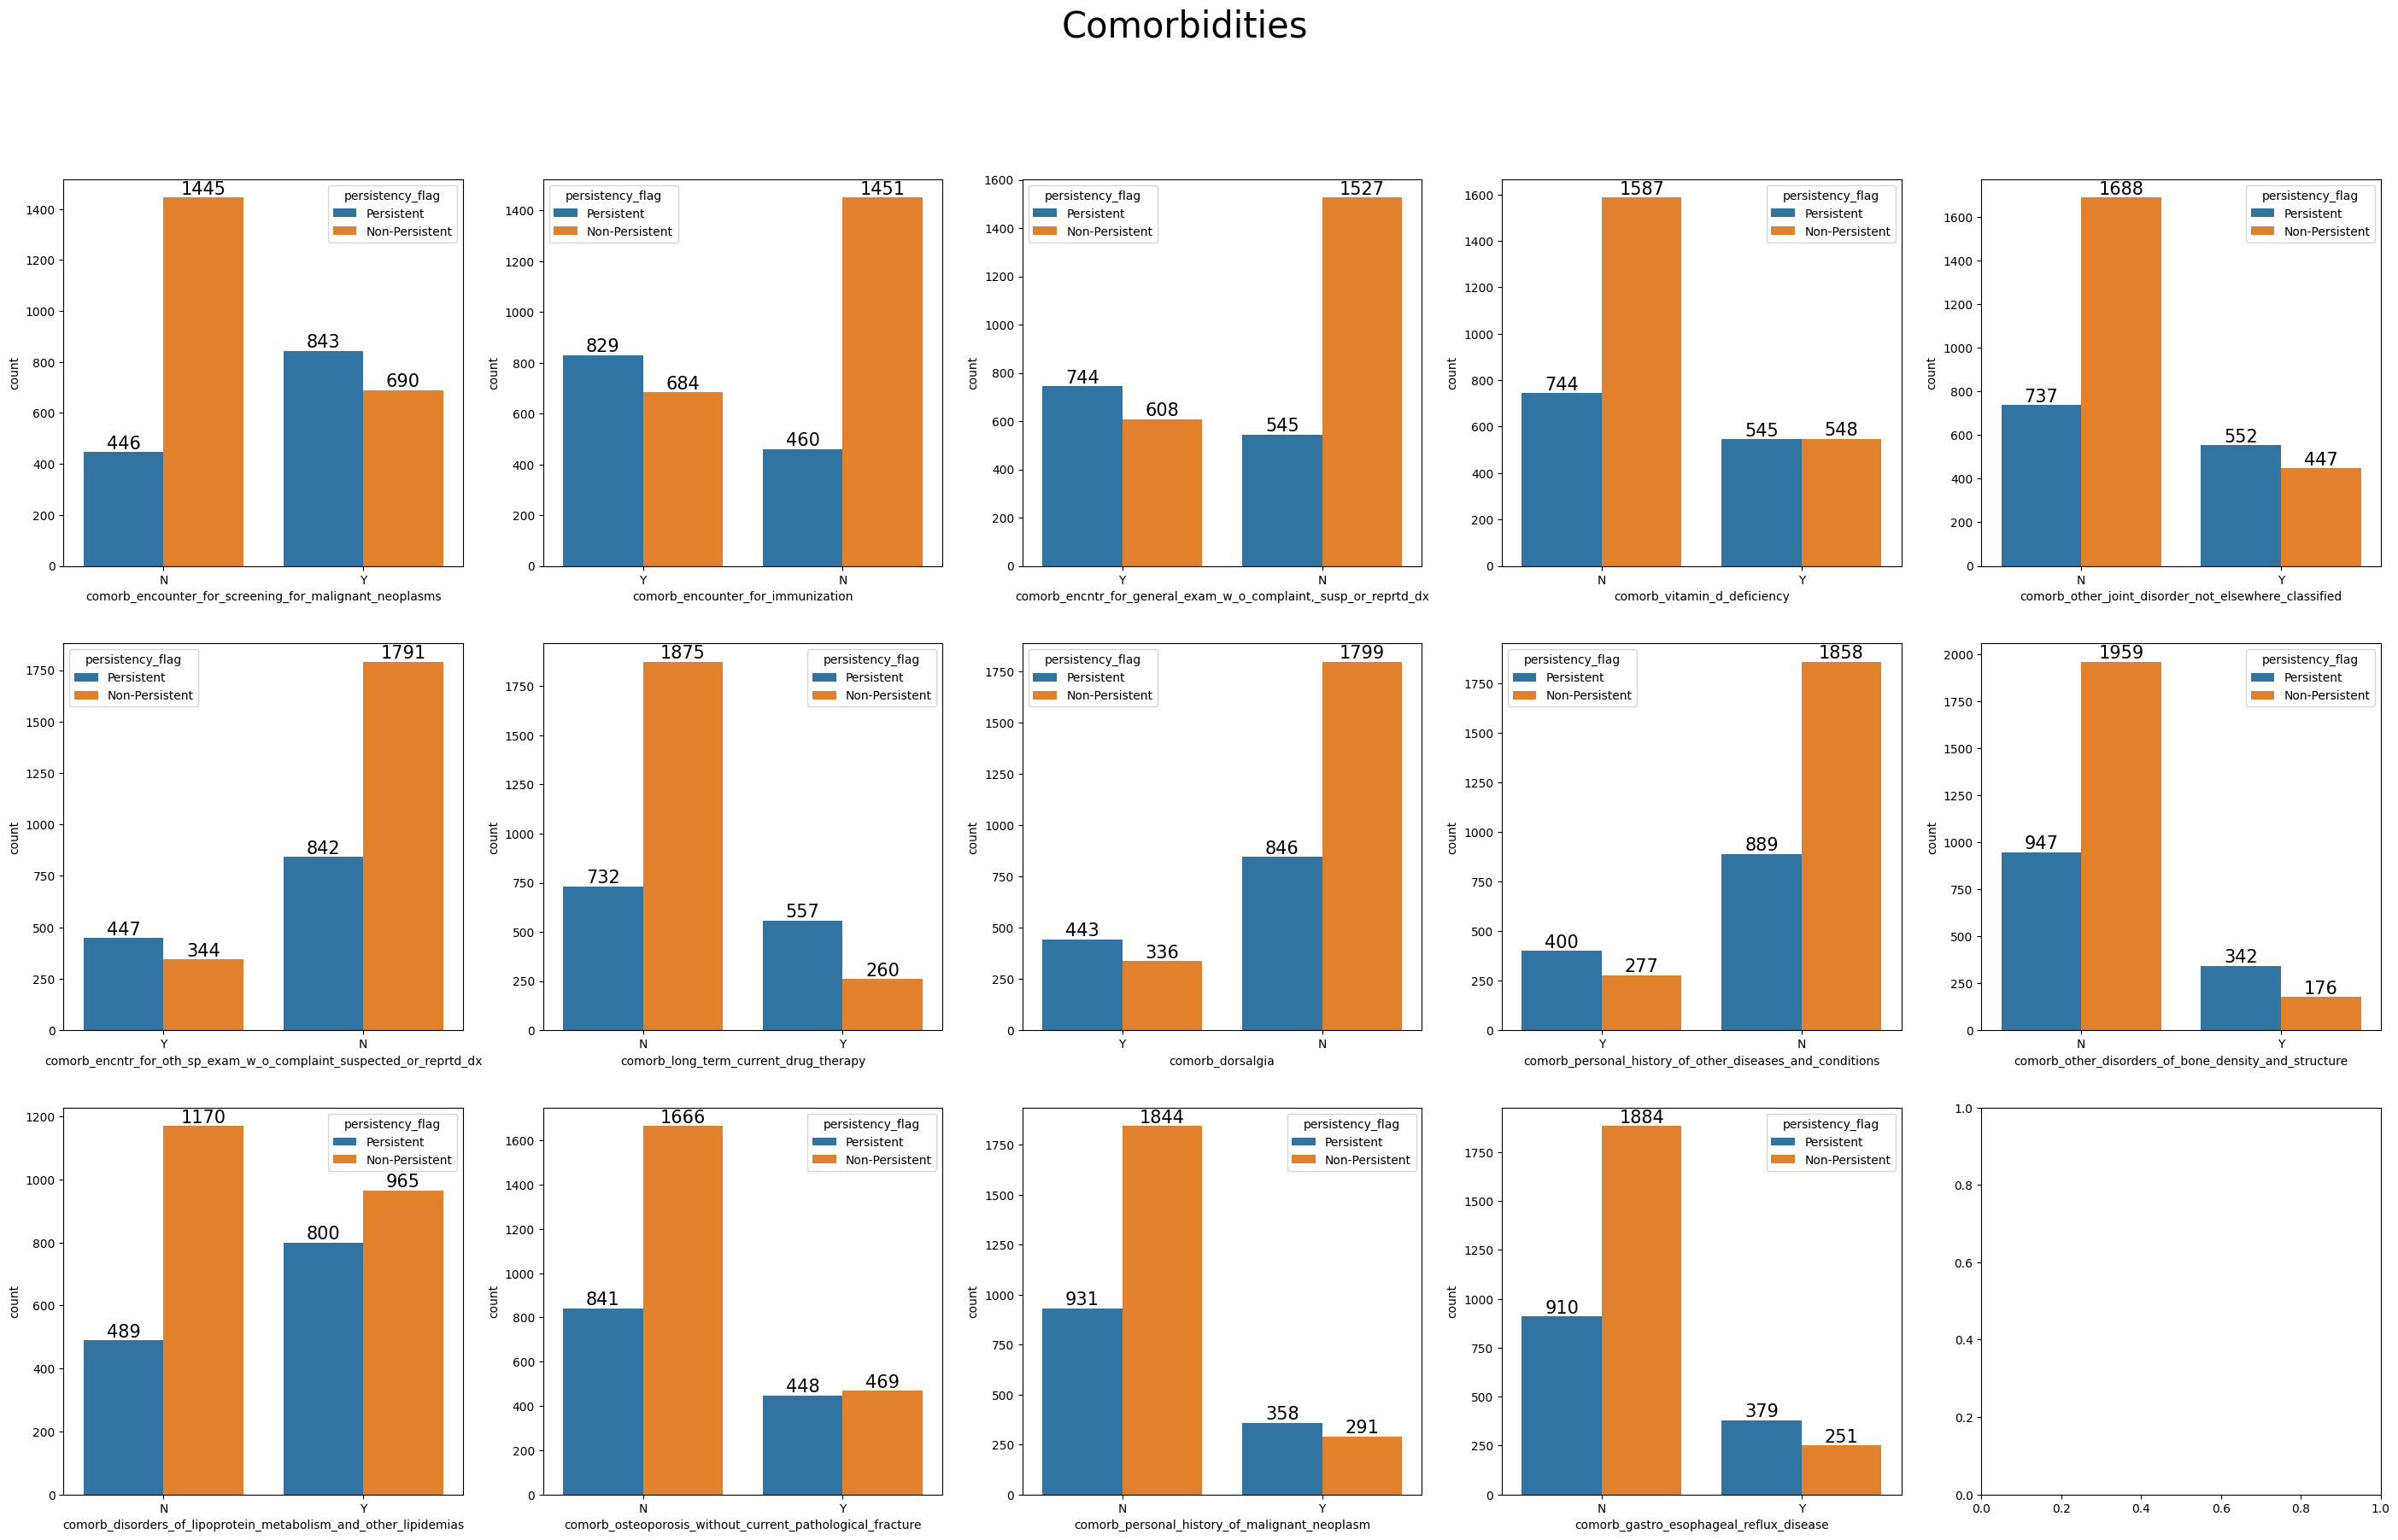

In [28]:
fig, axs = plt.subplots(3,5, figsize = (35,20))
plt.suptitle("Comorbidities", fontsize = 30)
axs = axs.flatten()
for ax, col in zip(axs, comorb_cols):
  sns.countplot(data=df, x=col, ax = ax, hue = "persistency_flag")
  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

With the exception of the following comorbidities:

*   Lipoprotein metabolism and other lipidemias,
*   Osteoporosis without current pathological fracture,

Patients with comorbidities tend to have higher rates of Persistence.

#Creating a new dataframe that contains the count of comorbidities, concomitances and risks

In [29]:
df["comorbidity_count"] = df[comorb_cols].apply(lambda row: (row == "Y").sum(), axis = 1)
df["concomitance_count"] = df[concom_cols].apply(lambda row: (row == "Y").sum(), axis = 1)

In [30]:
df_count = df[['persistency_flag', 'comorbidity_count', 'concomitance_count', 'count_of_risks']]

In [31]:
df_count.head()

,persistency_flag,comorbidity_count,concomitance_count,count_of_risks
0,Persistent,5,0,0
1,Non-Persistent,1,0,0
2,Non-Persistent,2,1,2
3,Non-Persistent,6,3,1
4,Non-Persistent,5,3,1


In [32]:
cols = ['concomitance_count','comorbidity_count', 'count_of_risks']

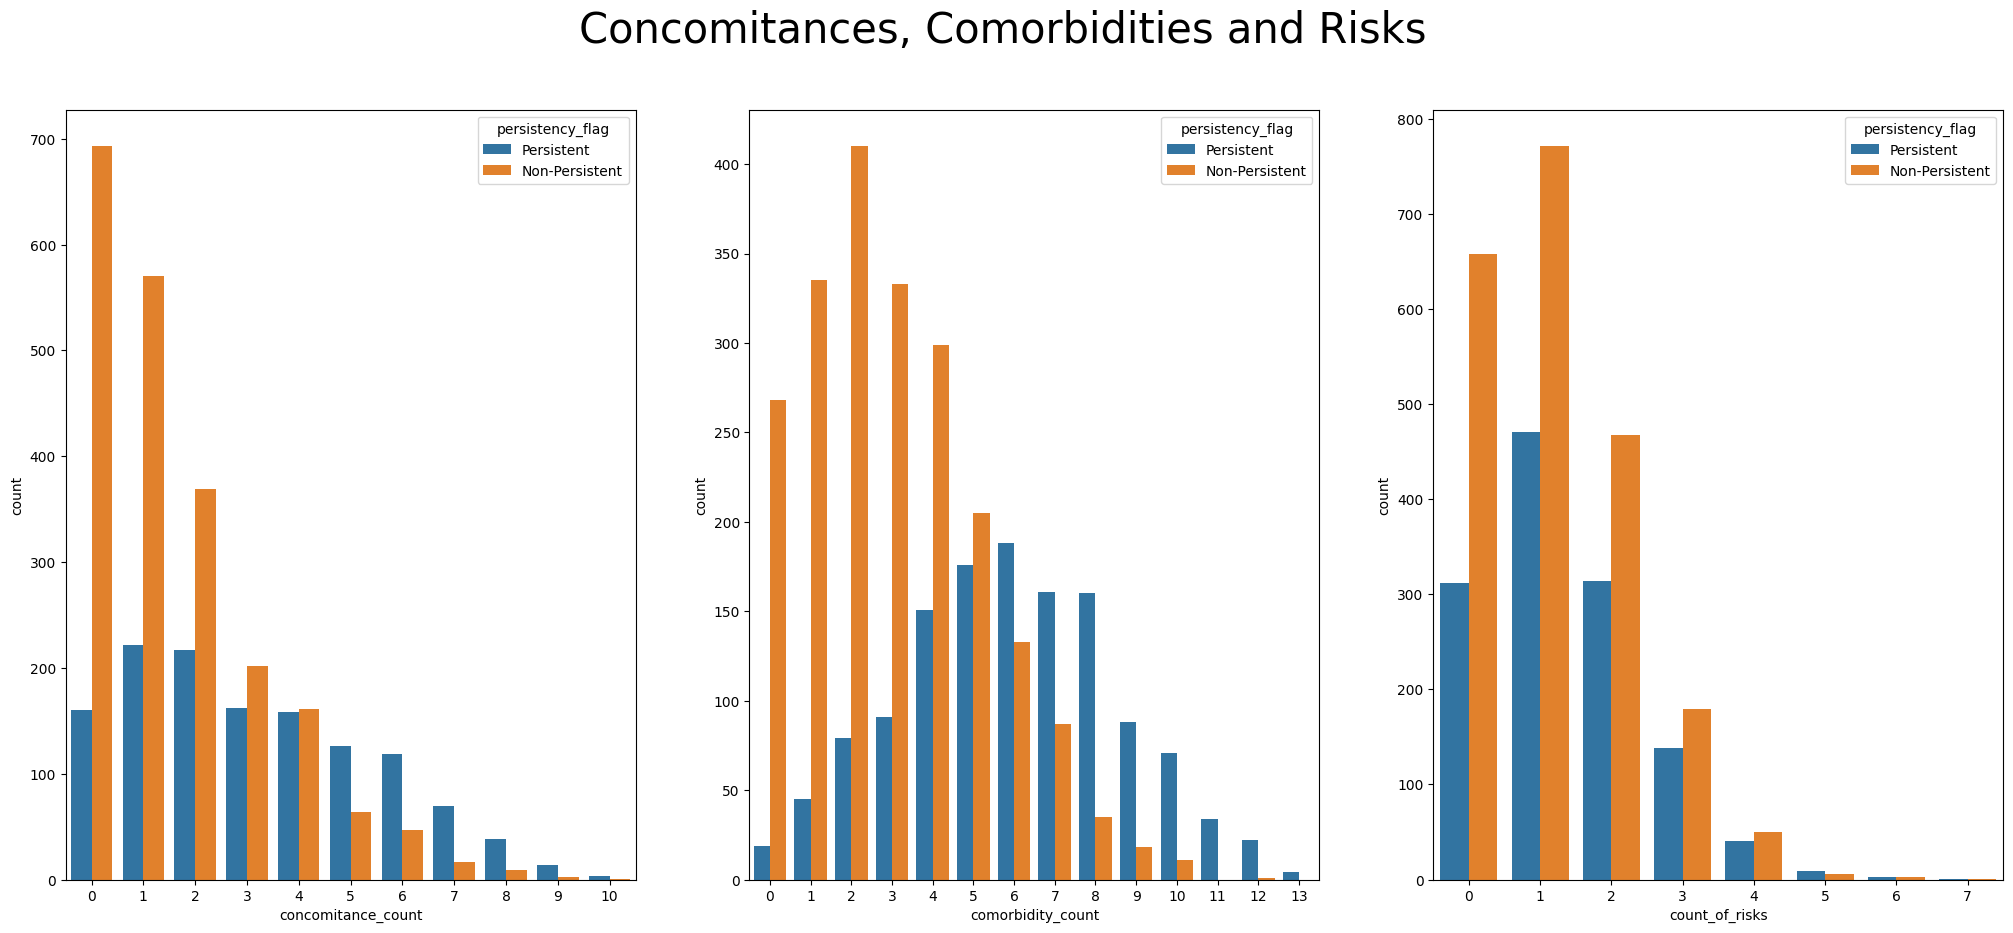

In [33]:
fig, axs = plt.subplots(1,3, figsize = (25,10))
plt.suptitle("Concomitances, Comorbidities and Risks", fontsize = 30)
axs = axs.flatten()
for ax, col in zip(axs, cols):
  sns.countplot(data=df_count, x=col, ax = ax, hue = "persistency_flag")
plt.show()

There is higher rate of persistence among patients with ≥5 concomitances, comorbities and risks.

Patients that are Persistent with their treatment are more likely to have multiple concomitances, comorbidities and risks

#Analyzing non-adherent yet persistent patients

In [34]:
df_nap = df[(df["adherent_flag"] == "Non-Adherent" ) & (df["persistency_flag"] == "Persistent")]

In [35]:
df_nap.describe(include="all")

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,comorbidity_count,concomitance_count
count,106,106,106,106,106,106,106,106,106,106,106,106,106.000000,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106.000000,106.000000,106.000000
unique,106,1,2,4,2,4,4,12,2,3,2,2,NaN,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,NaN,NaN,NaN
top,P160,Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,NaN,Y,N,N,VLR_LR,>-2.5,Non-Adherent,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,NaN,NaN,NaN
freq,1,106,100,96,104,42,39,42,59,62,86,67,NaN,63,81,90,61,64,106,89,101,69,63,61,57,60,69,63,71,74,87,55,78,84,78,66,54,61,63,79,70,74,78,70,91,103,106,103,106,102,105,103,81,83,104,91,102,61,105,105,105,106,106,104,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.707547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.405660,5.537736,3.339623
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.905353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185454,2.784907,2.353869
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#Adherent and non persistent

In [36]:
df_anp = df[(df["adherent_flag"] == "Adherent" ) & (df["persistency_flag"] == "Non-Persistent")]

In [37]:
df_anp.describe(include="all")

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,comorbidity_count,concomitance_count
count,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068.00000,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068,2068.000000,2068.000000,2068.000000
unique,2068,1,2,4,2,4,4,31,2,3,2,2,NaN,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN
top,P2,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,NaN,N,N,N,VLR_LR,>-2.5,Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN
freq,1,2068,1956,1904,2004,939,883,1010,1333,1392,1577,1682,NaN,1865,1738,1880,1155,1163,2068,1462,1789,1414,1428,1491,1547,1647,1738,1832,1749,1807,1896,1147,1619,1788,1833,1460,1488,1666,1581,1807,1849,1861,1916,1901,1973,1985,2066,2006,2066,2011,2061,1917,1745,1819,2059,1854,2041,1151,1936,2019,2032,2060,2054,2022,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.154739,2.909091,1.536750
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.72487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.060001,2.129902,1.640708
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#Adherent and Persistent

In [38]:
df_ap = df[(df["adherent_flag"] == "Adherent" ) & (df["persistency_flag"] == "Persistent")]

In [39]:
df_ap.describe(include="all")

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,adherent_flag,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,comorbidity_count,concomitance_count
count,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183.000000,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183,1183.000000,1183.000000,1183.000000
unique,1183,1,2,4,2,4,4,22,2,3,2,2,NaN,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,NaN,NaN,NaN
top,P1,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Specialist,OB/GYN/Others/PCP/Unknown,N,N,NaN,Y,N,N,VLR_LR,>-2.5,Adherent,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,NaN,NaN,NaN
freq,1,1183,1112,1089,1153,464,493,452,598,613,904,727,NaN,653,1000,984,676,686,1183,954,1100,774,766,683,687,677,773,669,775,815,860,745,763,847,832,679,618,680,783,850,852,863,936,902,953,1140,1182,1120,1183,1118,1180,1086,902,1001,1176,1065,1173,621,1129,1168,1167,1180,1183,1164,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350803,6.001691,3.139476
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.169062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.123287,2.666137,2.323642
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,Na

Statistical analysis of the Adherence and Persistence subsets revealed that specific clinical factors are common among both Non-Adherent and Adherent groups who maintain drug persistency. These factors include


*   Presence of dexa scans during treatment

*   Comorbidity screening for malignant neoplasms

*   Comorbidity encounter for immunization
*   General exam without complaints, suspected or reported diagnosis


*   Disorders of lipoprotein metabolism and other lipidemias


*   Risk of vitamin D insufficiency

